In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prince
import seaborn as sns
import statsmodels.stats.multitest
from scipy import stats
from scipy.stats import fisher_exact

# Makam vs Usul

In [2]:
makam_usul_counts_path = "../data/makam_usul_counts.csv"
df = pd.read_csv(makam_usul_counts_path, index_col=0)

In [3]:
df

,14/4,2+2+3,3+3+3+4,Aksak,Aksak (9/4),Aksaksemâî,Aksaksemâî Evferi,Aydın,Ayîn Devr-i Revânı,Ağır Aksaksemâî,...,Âzerî Yürüksemâî,Çenber,Çenber (12/2),Çeng-i Harbî,Çiftedüyek,Çiftesofyan,Çiftesofyan (9/16),İki-Bir,İkiz Aksak,Şarkı Devr-i Revânı
Acem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemaşîrân,0,0,0,9,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acembûselik,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemkürdî,0,0,0,6,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Acemtarab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şevk-ı-Cedîd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevk-ı-Dil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkutarab,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkâver,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Calculate which usuls are most commonly used with each makam
makam_preferred_usuls = {}
for makam, usuls in df.iterrows():
    # Get the most common usul(s)
    if usuls.sum() == 0:
        continue
    max_count = usuls.max()
    preferred = [u for u, c in usuls.items() if c == max_count]
    makam_preferred_usuls[makam] = (preferred, max_count)

# Display the results
print("Most common usul for each makam:")
for makam, (usuls, count) in sorted(
    makam_preferred_usuls.items(), key=lambda x: x[1][1], reverse=True
)[:15]:
    print(
        f"Makam: {makam}, Preferred usul(s): {', '.join(usuls)} (used {count} times)"
    )

Most common usul for each makam:
Makam: Hicaz, Preferred usul(s): Aksak (used 26 times)
Makam: Nihâvent, Preferred usul(s): Düyek (used 24 times)
Makam: Hüzzam, Preferred usul(s): Aksak (used 21 times)
Makam: Uşşak, Preferred usul(s): Aksak, Sofyan (used 19 times)
Makam: Mâhur, Preferred usul(s): Aksak (used 18 times)
Makam: Rast, Preferred usul(s): Düyek (used 18 times)
Makam: Segâh, Preferred usul(s): Aksak (used 18 times)
Makam: Hüseynî, Preferred usul(s): Sofyan (used 17 times)
Makam: Hicazkâr, Preferred usul(s): Düyek (used 15 times)
Makam: Kürdîlihicazkâr, Preferred usul(s): Aksak (used 13 times)
Makam: Muhayyer, Preferred usul(s): Sofyan (used 13 times)
Makam: Beyâtî, Preferred usul(s): Düyek (used 10 times)
Makam: Bûselik, Preferred usul(s): Düyek (used 10 times)
Makam: Sabâ, Preferred usul(s): Aksak, Düyek (used 10 times)
Makam: Acemaşîrân, Preferred usul(s): Aksak (used 9 times)


## Frequent combination study 
Here we study the Makam-Usul pairs that happen at least 2 times in the data

Chi-squared: 7545.99, p-value: 1.0219e-18, Cramer's V: 0.2217


<Figure size 1600x1200 with 0 Axes>

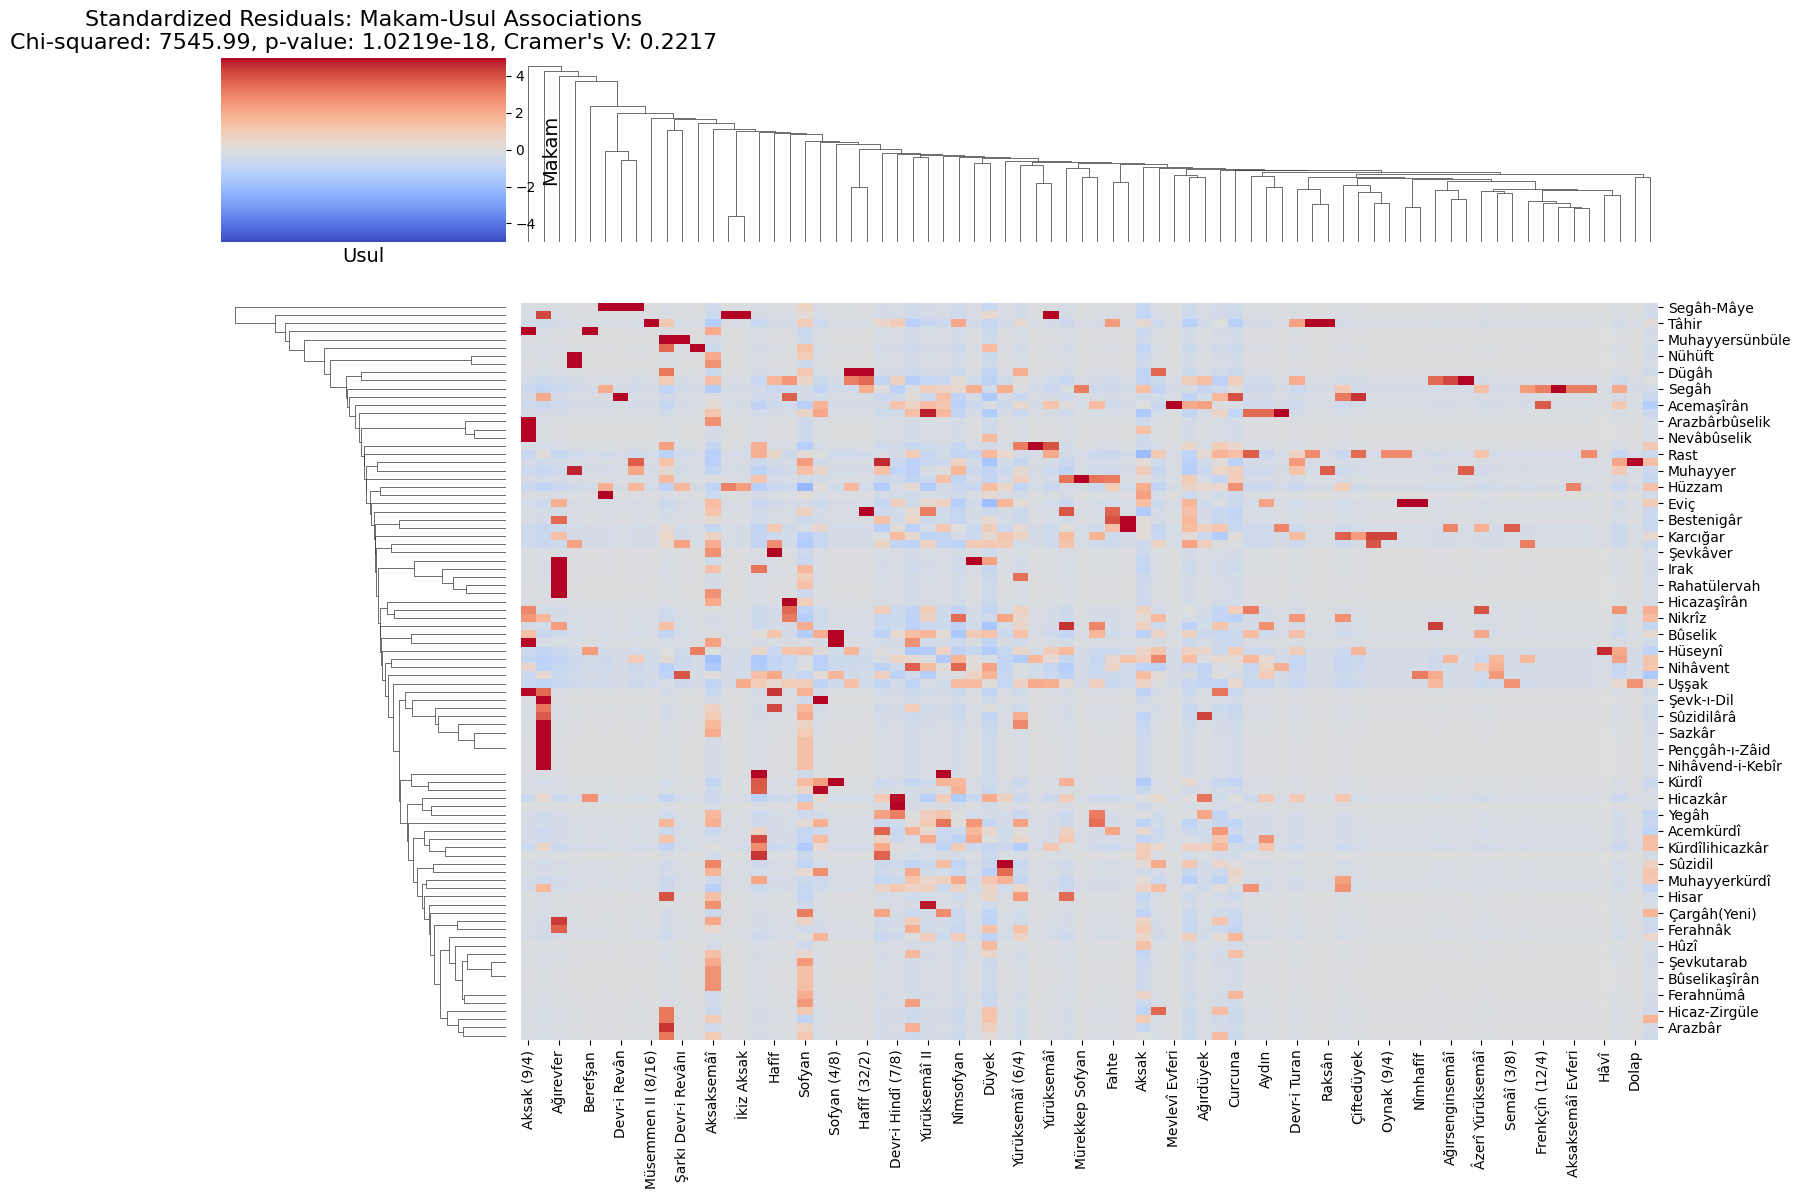

In [5]:
# Filter to include only makams and usuls with sufficient data if needed
total_ocurrence_threshold = 2

makam_row_sums = df.sum(axis=1)
usul_col_sums = df.sum(axis=0)

filtered_makams = makam_row_sums[
    makam_row_sums >= total_ocurrence_threshold
].index
filtered_usuls = usul_col_sums[
    usul_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = df.loc[filtered_makams, filtered_usuls]

# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V to measure association strength
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi_coef = np.sqrt(phi2 / min(k - 1, r - 1))

# Calculate standardized residuals to identify specific associations
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
std_residuals = pd.DataFrame(
    residuals, index=contingency_table.index, columns=contingency_table.columns
)

# Plot the standardized residuals as a heatmap
plt.figure(figsize=(16, 12))
mask = std_residuals == 0  # Mask cells with zero residuals (no occurrences)
sns.clustermap(
    std_residuals,
    cmap="coolwarm",
    center=0,
    row_cluster=True,
    col_cluster=True,
    figsize=(16, 12),
    annot=False,
    mask=mask,
    vmin=-5,
    vmax=5,
)  # Limiting the color scale
plt.title(
    "Standardized Residuals: Makam-Usul Associations\n"
    + f"Chi-squared: {chi2:.2f}, p-value: {p:.4e}, Cramer's V: {phi_coef:.4f}",
    fontsize=16,
)
plt.xlabel("Usul", fontsize=14)
plt.ylabel("Makam", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4e}, Cramer's V: {phi_coef:.4f}")

In [6]:
# Find the top 15 strongest positive associations
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations = flat_residuals.head(15).reset_index()
top_associations.columns = ["Makam", "Usul", "Standardized Residual"]
print("Top 15 strongest positive Makam-Usul associations:")
print(top_associations)

# Find the top 15 strongest negative associations (avoidances)
bottom_associations = flat_residuals.tail(15).reset_index()
bottom_associations.columns = ["Makam", "Usul", "Standardized Residual"]
print("\nTop 15 strongest negative Makam-Usul associations (avoidances):")
print(bottom_associations)

Top 15 strongest positive Makam-Usul associations:
              Makam                 Usul  Standardized Residual
0        Segâh-Mâye         Devr-i Revân              16.155612
1      Tâhirbûselik             Berefşan              15.224390
2   Muhayyersünbüle  Şarkı Devr-i Revânı              14.436231
3         Zîrefkend         Darb-ı Fetih              14.436231
4             Tâhir   Müsemmen II (8/16)              14.298349
5              Acem             Nîmevsat              13.165828
6            Rehâvî                Remel              13.165828
7            Nühüft         Darb-ı Fetih              11.758988
8        Segâh-Mâye                 Darb              11.380141
9            Rehâvî           İkiz Aksak              10.719023
10       Segâh-Mâye          Müsemmen II              10.159208
11   Arazbârbûselik          Aksak (9/4)              10.159208
12      Acembûselik          Aksak (9/4)              10.159208
13      Nevâbûselik          Aksak (9/4)             

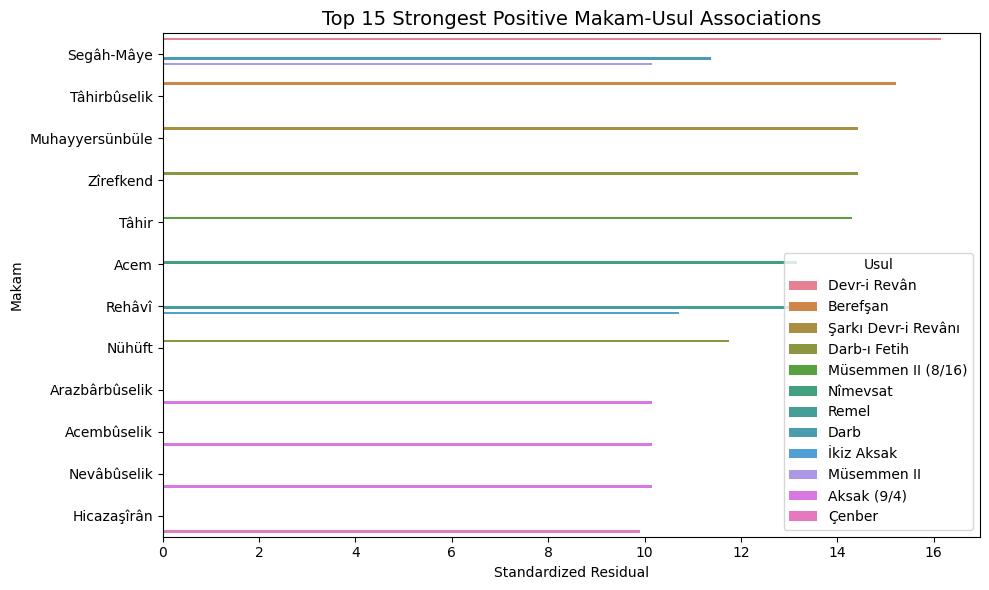

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Standardized Residual", y="Makam", hue="Usul", data=top_associations
)
plt.title("Top 15 Strongest Positive Makam-Usul Associations", fontsize=14)
plt.tight_layout()
plt.show()

## Rare combinations study 
Here we study the Makam-Usul pairs that happen at less than 2 times in the data

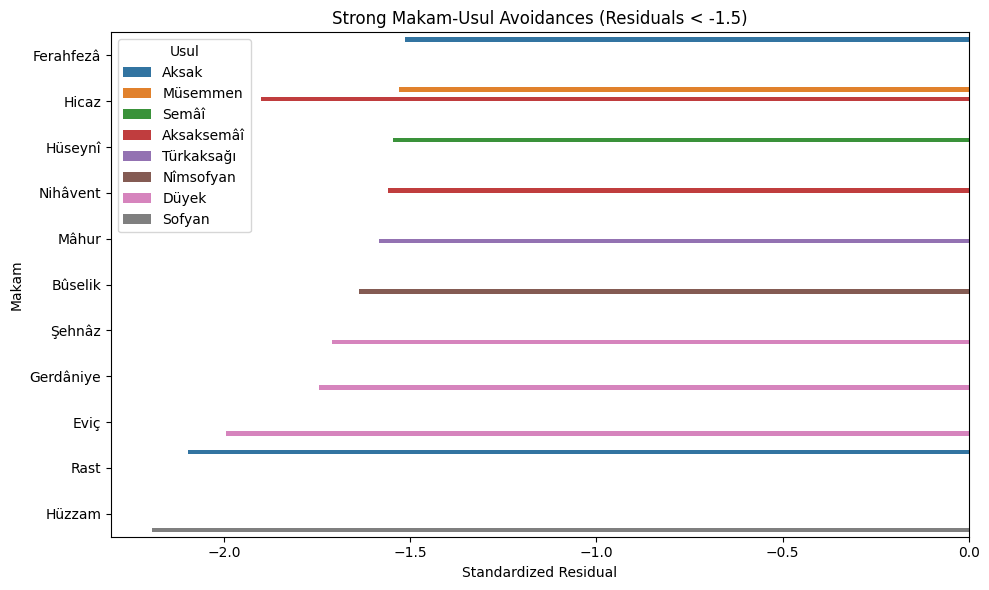

In [8]:
avoidance_threshold = -1.5  # or -2 for more conservative
strong_avoidances = flat_residuals[
    flat_residuals < avoidance_threshold
].reset_index()
strong_avoidances.columns = ["Makam", "Usul", "Standardized Residual"]

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Standardized Residual", y="Makam", hue="Usul", data=strong_avoidances
)
plt.title("Strong Makam-Usul Avoidances (Residuals < -1.5)")
plt.tight_layout()
plt.show()

## Correspondence Analysis

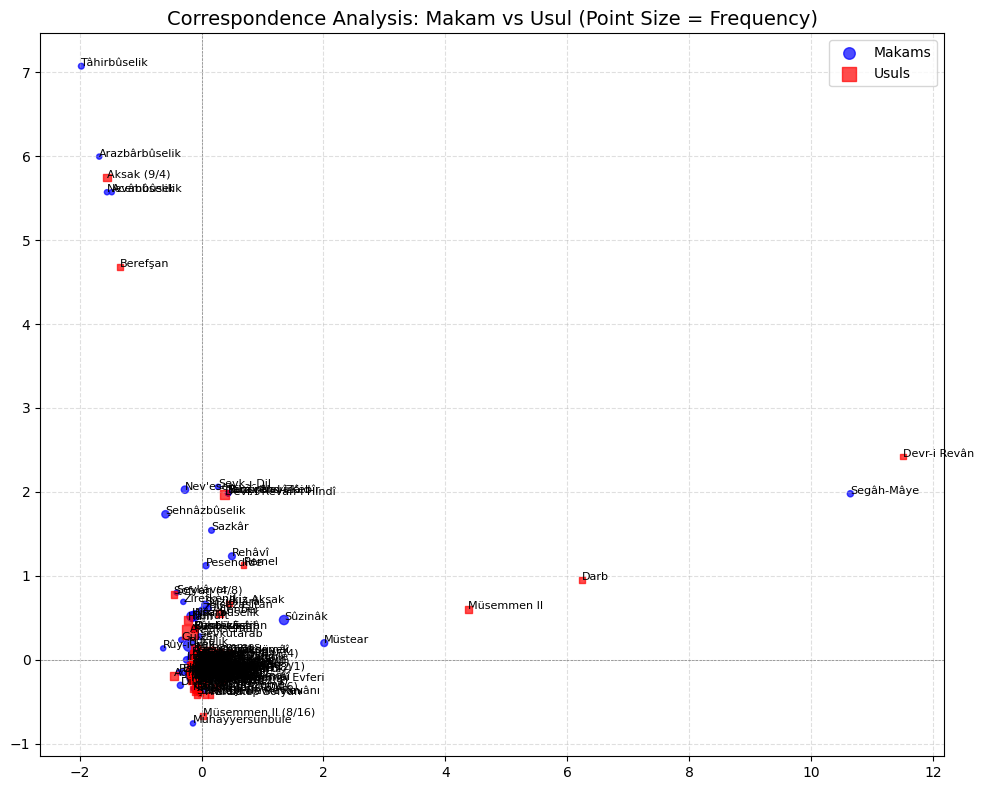

In [9]:
# Perform Correspondence Analysis (CA)
ca = prince.CA(
    n_components=2, n_iter=10, copy=True, check_input=True, engine="sklearn"
)
ca = ca.fit(contingency_table)

# Get coordinates
row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)

# Calculate total occurrences
makam_sizes = contingency_table.sum(axis=1)
usul_sizes = contingency_table.sum(axis=0)

# Normalize sizes for plotting
makam_sizes_norm = (makam_sizes**0.5) * 10
usul_sizes_norm = (usul_sizes**0.5) * 10

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot makams with size scaling
ax.scatter(
    row_coords[0],
    row_coords[1],
    s=makam_sizes_norm[row_coords.index],  # size by frequency
    c="blue",
    label="Makams",
    alpha=0.7,
)
for i, txt in enumerate(row_coords.index):
    ax.annotate(
        txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), fontsize=8
    )

# Plot usuls with size scaling
ax.scatter(
    col_coords[0],
    col_coords[1],
    s=usul_sizes_norm[col_coords.index],  # size by frequency
    c="red",
    marker="s",
    label="Usuls",
    alpha=0.7,
)
for i, txt in enumerate(col_coords.index):
    ax.annotate(
        txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), fontsize=8
    )

# Axes styling
ax.axhline(0, color="gray", linestyle="--", linewidth=0.5)
ax.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title(
    "Correspondence Analysis: Makam vs Usul (Point Size = Frequency)",
    fontsize=14,
)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Fisher's Exact Test

/tmp/ipykernel_3141/3736004665.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fisher_results = fisher_results._append(


Top 15 most significant Makam-Usul associations by Fisher's exact test:
                Makam                 Usul  Odds_Ratio   P_Value  FDR_P_Value
5594            Tâhir   Müsemmen II (8/16)         inf  0.000003     0.017444
2238         Hicazkâr   Devr-i Hindî (7/8)    7.701665  0.000391     1.000000
3829         Nihâvent                Semâî    3.037548  0.000591     1.000000
3822         Nihâvent            Nîmsofyan    2.962093  0.000740     1.000000
113        Acemaşîrân       Mevlevî Evferi         inf  0.000883     1.000000
5029            Segâh              İki-Bir         inf  0.001810     1.000000
1664        Gerdâniye           K. Curcuna    9.033259  0.001937     1.000000
5342          Sûzinâk              Curcuna    6.667790  0.002396     1.000000
1470        Ferahfezâ        Yürüksemâî II   12.124260  0.003458     1.000000
5053       Segâh-Mâye         Devr-i Revân  699.666667  0.003800     1.000000
5637     Tâhirbûselik             Berefşan  524.750000  0.004273     1

/mnt/c/Users/SerX610/Documents/MASTER/AMP/ethnomusicology-project/venv/lib/python3.12/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


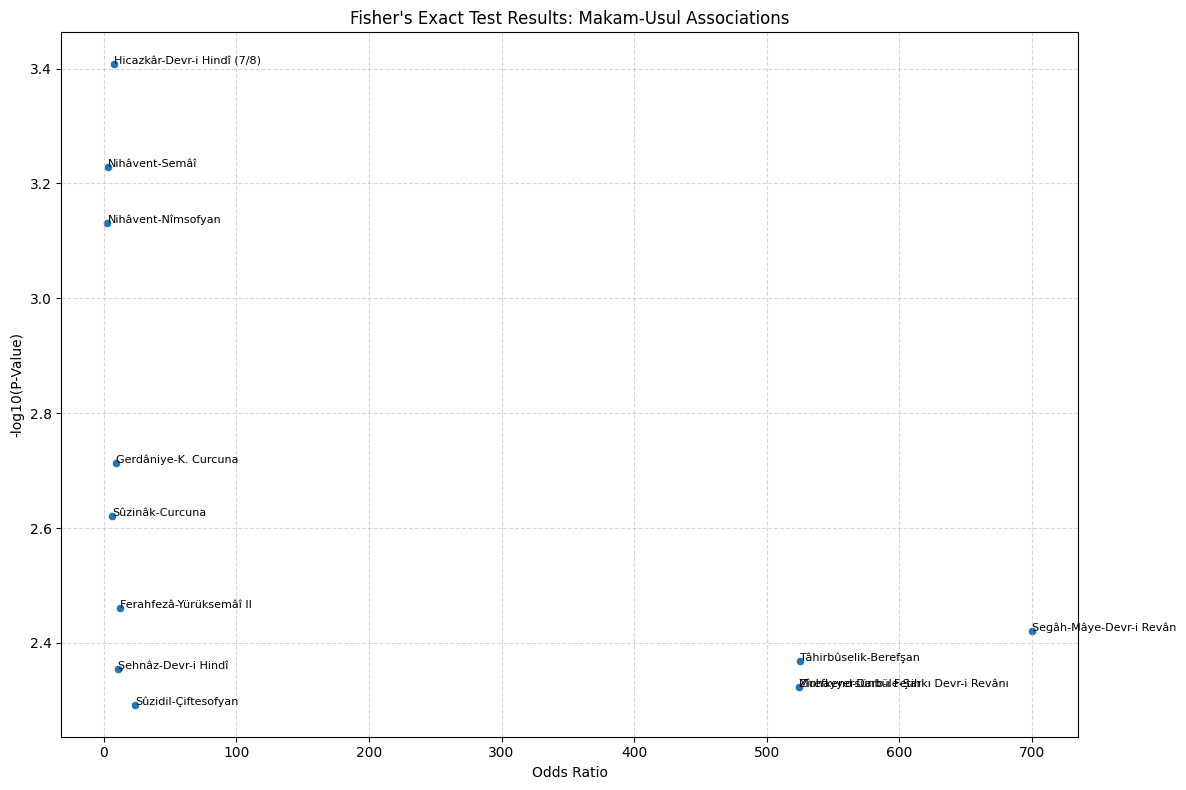

In [10]:
# Create a dataframe to store results
fisher_results = pd.DataFrame(
    columns=["Makam", "Usul", "Odds_Ratio", "P_Value"]
)

# For each Makam-Usul pair, create a 2x2 contingency table and run Fisher's exact test
for makam in contingency_table.index:
    for usul in contingency_table.columns:
        # Get value for this specific Makam-Usul pair
        val = contingency_table.loc[makam, usul]

        # Create 2x2 table:
        # [ val, row_sum - val ]
        # [ col_sum - val, total - row_sum - col_sum + val ]
        row_sum = contingency_table.loc[makam].sum()
        col_sum = contingency_table[usul].sum()
        total = contingency_table.sum().sum()

        # Create the 2x2 table
        table = np.array(
            [
                [val, row_sum - val],
                [col_sum - val, total - row_sum - col_sum + val],
            ]
        )

        # Run Fisher's exact test
        odds_ratio, p_value = fisher_exact(table)

        # Store results
        fisher_results = fisher_results._append(
            {
                "Makam": makam,
                "Usul": usul,
                "Odds_Ratio": odds_ratio,
                "P_Value": p_value,
            },
            ignore_index=True,
        )

# Apply multiple testing correction (Benjamini-Hochberg FDR)
fisher_results["FDR_P_Value"] = statsmodels.stats.multitest.fdrcorrection(
    fisher_results["P_Value"]
)[1]

# Sort by significance
fisher_results_sorted = fisher_results.sort_values("P_Value")

# Display top significant associations
print(
    "Top 15 most significant Makam-Usul associations by Fisher's exact test:"
)
print(fisher_results_sorted.head(15))

# Visualize top significant results
plt.figure(figsize=(12, 8))
top_results = fisher_results_sorted.head(15)
sns.scatterplot(
    x="Odds_Ratio",
    y="-log10(P_Value)",
    data=top_results.assign(
        **{"-log10(P_Value)": -np.log10(top_results["P_Value"])}
    ),
)

# Add labels for the top points
for i, row in top_results.iterrows():
    plt.text(
        row["Odds_Ratio"],
        -np.log10(row["P_Value"]),
        f"{row['Makam']}-{row['Usul']}",
        fontsize=8,
    )

plt.title("Fisher's Exact Test Results: Makam-Usul Associations")
plt.xlabel("Odds Ratio")
plt.ylabel("-log10(P-Value)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Makam vs Cycle Length

In [11]:
makam_cycle_length_counts_path = "../data/makam_vs_cycle_length_counts.csv"
makam_cycles_df = pd.read_csv(makam_cycle_length_counts_path, index_col=0)

In [12]:
makam_cycles_df

,Extended,Long,Medium,Short
Acem,1,2,4,2
Acemaşîrân,5,9,42,12
Acembûselik,0,0,2,0
Acemkürdî,1,8,21,9
Acemtarab,1,0,0,0
...,...,...,...,...
Şevk-ı-Cedîd,0,0,1,0
Şevk-ı-Dil,1,1,0,0
Şevkutarab,0,1,0,2
Şevkâver,1,1,0,0


In [13]:
# Calculate which cycle lengths are most commonly used with each makam
makam_preferred_cycle_length = {}
for makam, cycle_length in makam_cycles_df.iterrows():
    # Get the most common cycle length(s)
    if cycle_length.sum() == 0:
        continue
    max_count = cycle_length.max()
    preferred = [u for u, c in cycle_length.items() if c == max_count]
    makam_preferred_cycle_length[makam] = (preferred, max_count)

# Display the results
print("Most common cycle length for each makam:")
for makam, (cycle_length, count) in sorted(
    makam_preferred_cycle_length.items(), key=lambda x: x[1][1], reverse=True
)[:15]:
    print(
        f"Makam: {makam}, Preferred cycle length(s): {', '.join(cycle_length)} (used {count} times)"
    )

Most common cycle length for each makam:
Makam: Hicaz, Preferred cycle length(s): Medium (used 96 times)
Makam: Nihâvent, Preferred cycle length(s): Medium (used 69 times)
Makam: Uşşak, Preferred cycle length(s): Medium (used 67 times)
Makam: Hüzzam, Preferred cycle length(s): Medium (used 63 times)
Makam: Rast, Preferred cycle length(s): Medium (used 60 times)
Makam: Hicazkâr, Preferred cycle length(s): Medium (used 54 times)
Makam: Segâh, Preferred cycle length(s): Medium (used 53 times)
Makam: Hüseynî, Preferred cycle length(s): Medium (used 50 times)
Makam: Mâhur, Preferred cycle length(s): Medium (used 50 times)
Makam: Kürdîlihicazkâr, Preferred cycle length(s): Medium (used 47 times)
Makam: Acemaşîrân, Preferred cycle length(s): Medium (used 42 times)
Makam: Sabâ, Preferred cycle length(s): Medium (used 42 times)
Makam: Beyâtî, Preferred cycle length(s): Medium (used 40 times)
Makam: Bûselik, Preferred cycle length(s): Medium (used 35 times)
Makam: Karcığar, Preferred cycle lengt

## Frequent combination study 
Here we study the Makam - Cycle length pairs that happen at least 2 times in the data

Chi-squared: 357.45, p-value: 2.2740e-03, Cramer's V: 0.2290


<Figure size 1600x1200 with 0 Axes>

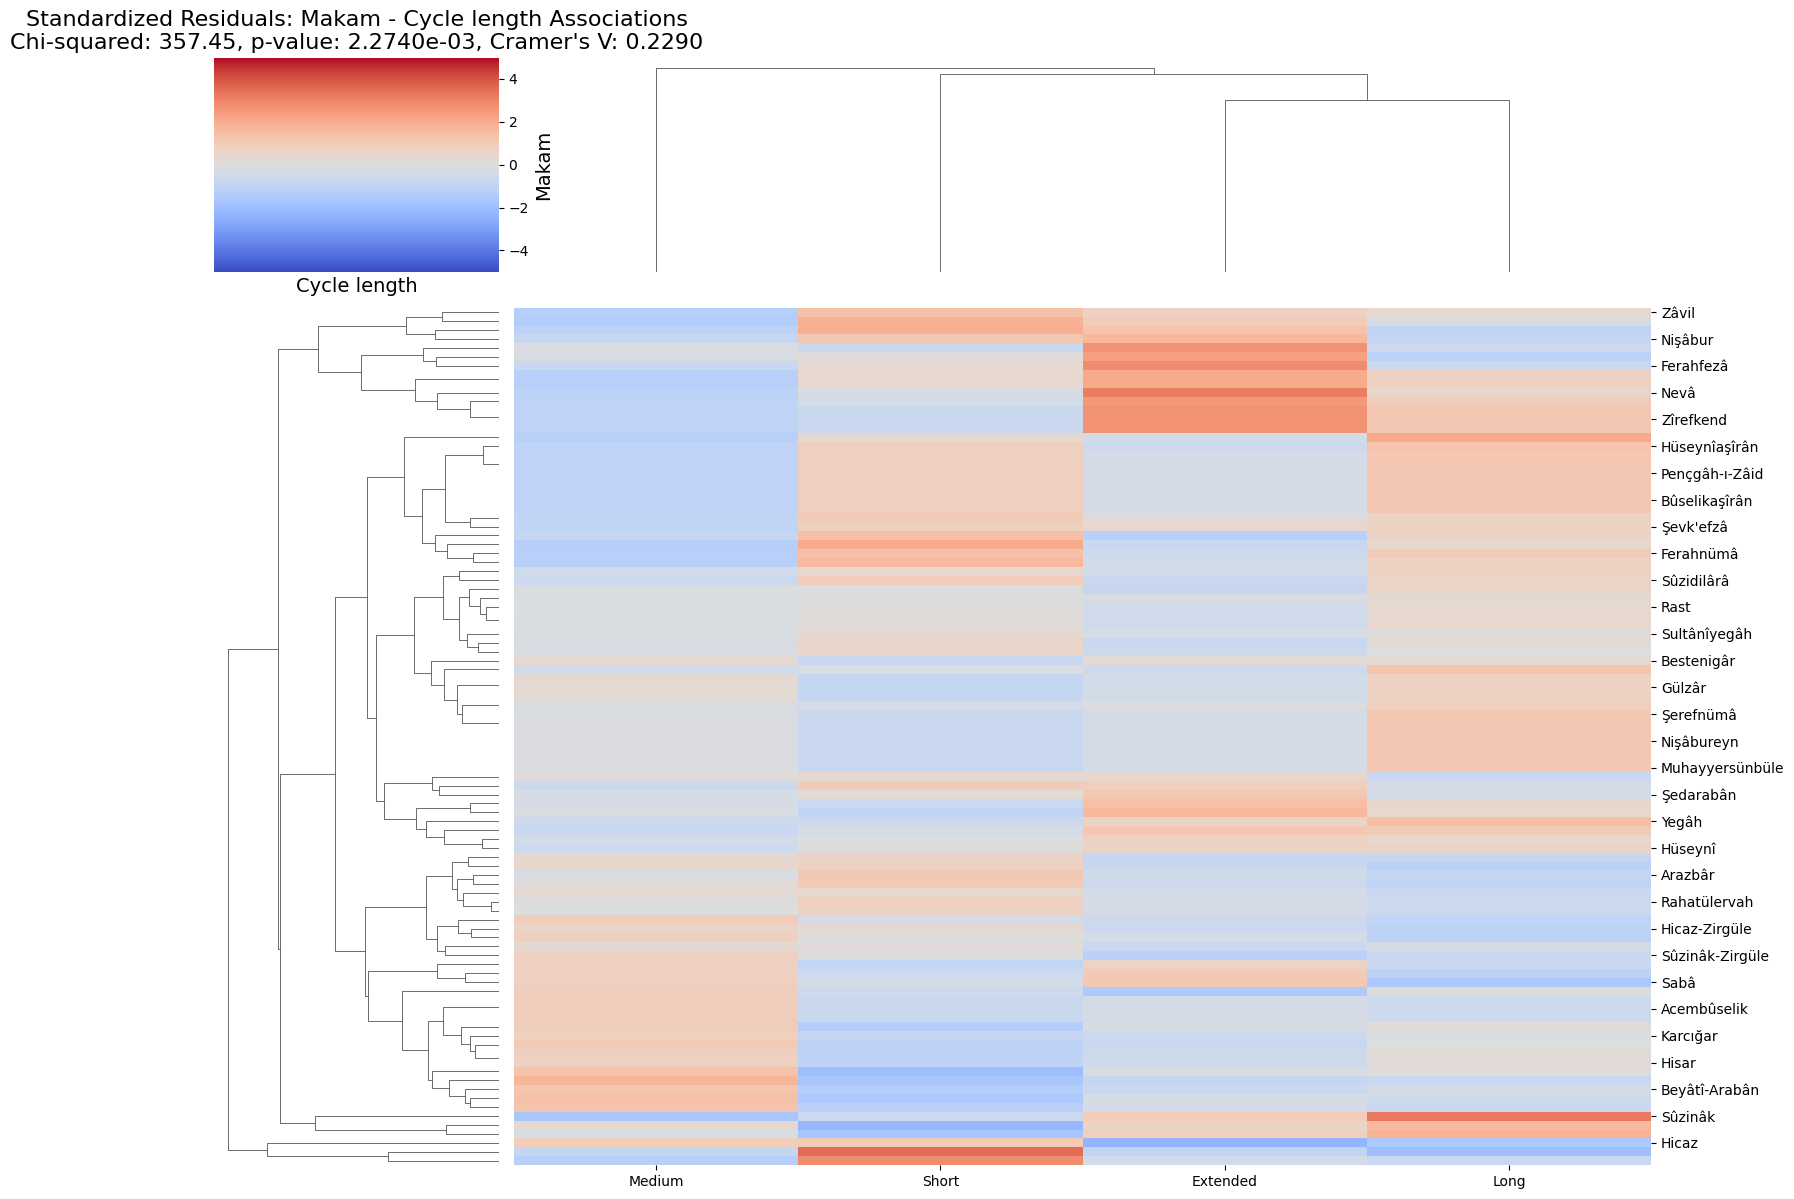

In [14]:
# Filter to include only makams and cycle lengths with sufficient data if needed
total_ocurrence_threshold = 2

makam_row_sums = makam_cycles_df.sum(axis=1)
cycle_length_col_sums = makam_cycles_df.sum(axis=0)

filtered_makams = makam_row_sums[
    makam_row_sums >= total_ocurrence_threshold
].index
filtered_cycle_lengths = cycle_length_col_sums[
    cycle_length_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = makam_cycles_df.loc[filtered_makams, filtered_cycle_lengths]

# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V to measure association strength
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi_coef = np.sqrt(phi2 / min(k - 1, r - 1))

# Calculate standardized residuals to identify specific associations
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
std_residuals = pd.DataFrame(
    residuals, index=contingency_table.index, columns=contingency_table.columns
)

# Plot the standardized residuals as a heatmap
plt.figure(figsize=(16, 12))
mask = std_residuals == 0  # Mask cells with zero residuals (no occurrences)
sns.clustermap(
    std_residuals,
    cmap="coolwarm",
    center=0,
    row_cluster=True,
    col_cluster=True,
    figsize=(16, 12),
    annot=False,
    mask=mask,
    vmin=-5,
    vmax=5,
)  # Limiting the color scale
plt.title(
    "Standardized Residuals: Makam - Cycle length Associations\n"
    + f"Chi-squared: {chi2:.2f}, p-value: {p:.4e}, Cramer's V: {phi_coef:.4f}",
    fontsize=16,
)
plt.xlabel("Cycle length", fontsize=14)
plt.ylabel("Makam", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4e}, Cramer's V: {phi_coef:.4f}")

In [15]:
# Find the top 15 strongest positive associations
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations = flat_residuals.head(15).reset_index()
top_associations.columns = ["Makam", "Cycle length", "Standardized Residual"]
print("Top 15 strongest positive Makam - Cycle length associations:")
print(top_associations)

# Find the top 15 strongest negative associations (avoidances)
bottom_associations = flat_residuals.tail(15).reset_index()
bottom_associations.columns = ["Makam", "Cycle length", "Standardized Residual"]
print("\nTop 15 strongest negative Makam - Cycle length associations (avoidances):")
print(bottom_associations)

Top 15 strongest positive Makam - Cycle length associations:
            Makam Cycle length  Standardized Residual
0        Nihâvent        Short               3.511477
1         Sûzinâk         Long               3.230318
2            Nevâ     Extended               3.158595
3       Ferahfezâ     Extended               2.850811
4         Pençgâh        Short               2.787557
5      Şevk-ı-Dil     Extended               2.656441
6        Şevkâver     Extended               2.656441
7       Zîrefkend     Extended               2.656441
8          Çargâh     Extended               2.656441
9   Hicaz-Hümâyûn     Extended               2.517281
10          Dügâh     Extended               2.322082
11         Sazkâr         Long               2.096648
12  Şehnâzbûselik        Short               2.043839
13    Hicazaşîrân     Extended               2.032473
14         Nühüft     Extended               2.032473

Top 15 strongest negative Makam - Cycle length associations (avoidances):


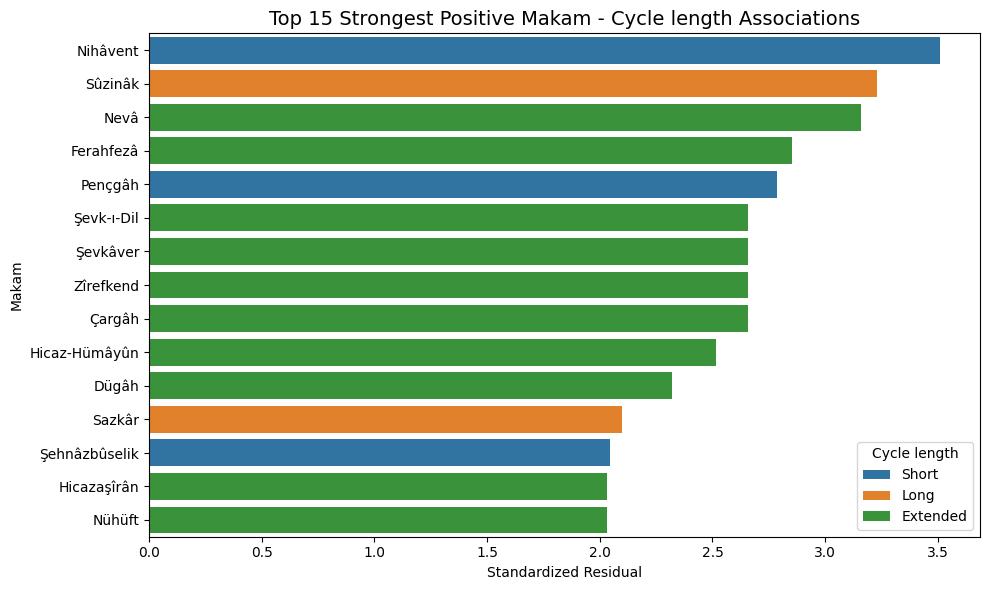

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Standardized Residual", y="Makam", hue="Cycle length", data=top_associations
)
plt.title("Top 15 Strongest Positive Makam - Cycle length Associations", fontsize=14)
plt.tight_layout()
plt.show()

## Rare combinations study 
Here we study the Makam - Cycle length pairs that happen at less than 2 times in the data

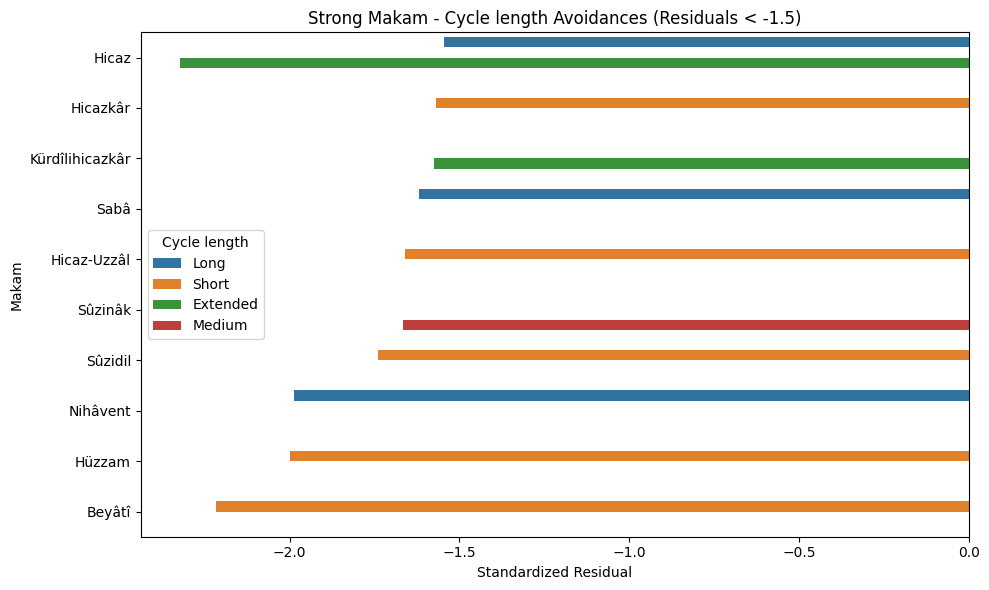

In [17]:
avoidance_threshold = -1.5  # or -2 for more conservative
strong_avoidances = flat_residuals[
    flat_residuals < avoidance_threshold
].reset_index()
strong_avoidances.columns = ["Makam", "Cycle length", "Standardized Residual"]

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Standardized Residual", y="Makam", hue="Cycle length", data=strong_avoidances
)
plt.title("Strong Makam - Cycle length Avoidances (Residuals < -1.5)")
plt.tight_layout()
plt.show()

## Correspondence Analysis

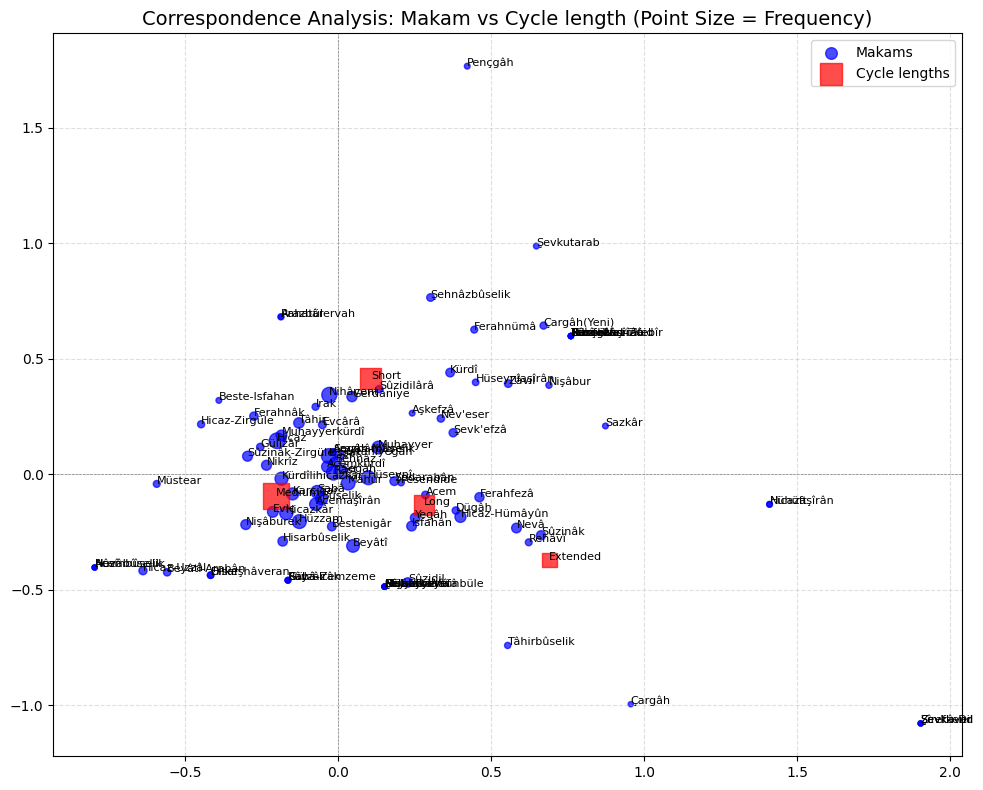

In [18]:
# Perform Correspondence Analysis (CA)
ca = prince.CA(
    n_components=2, n_iter=10, copy=True, check_input=True, engine="sklearn"
)
ca = ca.fit(contingency_table)

# Get coordinates
row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)

# Calculate total occurrences
makam_sizes = contingency_table.sum(axis=1)
cycle_length_sizes = contingency_table.sum(axis=0)

# Normalize sizes for plotting
makam_sizes_norm = (makam_sizes**0.5) * 10
cycle_length_sizes_norm = (cycle_length_sizes**0.5) * 10

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot makams with size scaling
ax.scatter(
    row_coords[0],
    row_coords[1],
    s=makam_sizes_norm[row_coords.index],  # size by frequency
    c="blue",
    label="Makams",
    alpha=0.7,
)
for i, txt in enumerate(row_coords.index):
    ax.annotate(
        txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), fontsize=8
    )

# Plot cycle_lengths with size scaling
ax.scatter(
    col_coords[0],
    col_coords[1],
    s=cycle_length_sizes_norm[col_coords.index],  # size by frequency
    c="red",
    marker="s",
    label="Cycle lengths",
    alpha=0.7,
)
for i, txt in enumerate(col_coords.index):
    ax.annotate(
        txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), fontsize=8
    )

# Axes styling
ax.axhline(0, color="gray", linestyle="--", linewidth=0.5)
ax.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title(
    "Correspondence Analysis: Makam vs Cycle length (Point Size = Frequency)",
    fontsize=14,
)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Fisher's Exact Test

/tmp/ipykernel_3141/2979502237.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fisher_results = fisher_results._append(


Top 15 most significant Makam-Cycle length associations by Fisher's exact test:
             Makam Cycle length  Odds_Ratio   P_Value  FDR_P_Value
215       Nihâvent        Short    2.095270  0.000103     0.039546
309        Sûzinâk         Long    4.507200  0.001934     0.371380
104          Hicaz     Extended    0.201215  0.007132     0.580709
39          Beyâtî        Short    0.370999  0.008429     0.580709
114    Hicaz-Uzzâl       Medium    9.227828  0.008711     0.580709
200           Nevâ     Extended    4.585850  0.009074     0.580709
239        Pençgâh        Short         inf  0.012005     0.658552
310        Sûzinâk       Medium    0.294390  0.018560     0.738858
76       Ferahfezâ     Extended    4.617886  0.018742     0.738858
151         Hüzzam        Short    0.501575  0.019241     0.738858
108  Hicaz-Hümâyûn     Extended    3.078755  0.021686     0.757027
213       Nihâvent         Long    0.529129  0.026268     0.840578
363  Şehnâzbûselik        Short    4.232074  0.03

/mnt/c/Users/SerX610/Documents/MASTER/AMP/ethnomusicology-project/venv/lib/python3.12/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


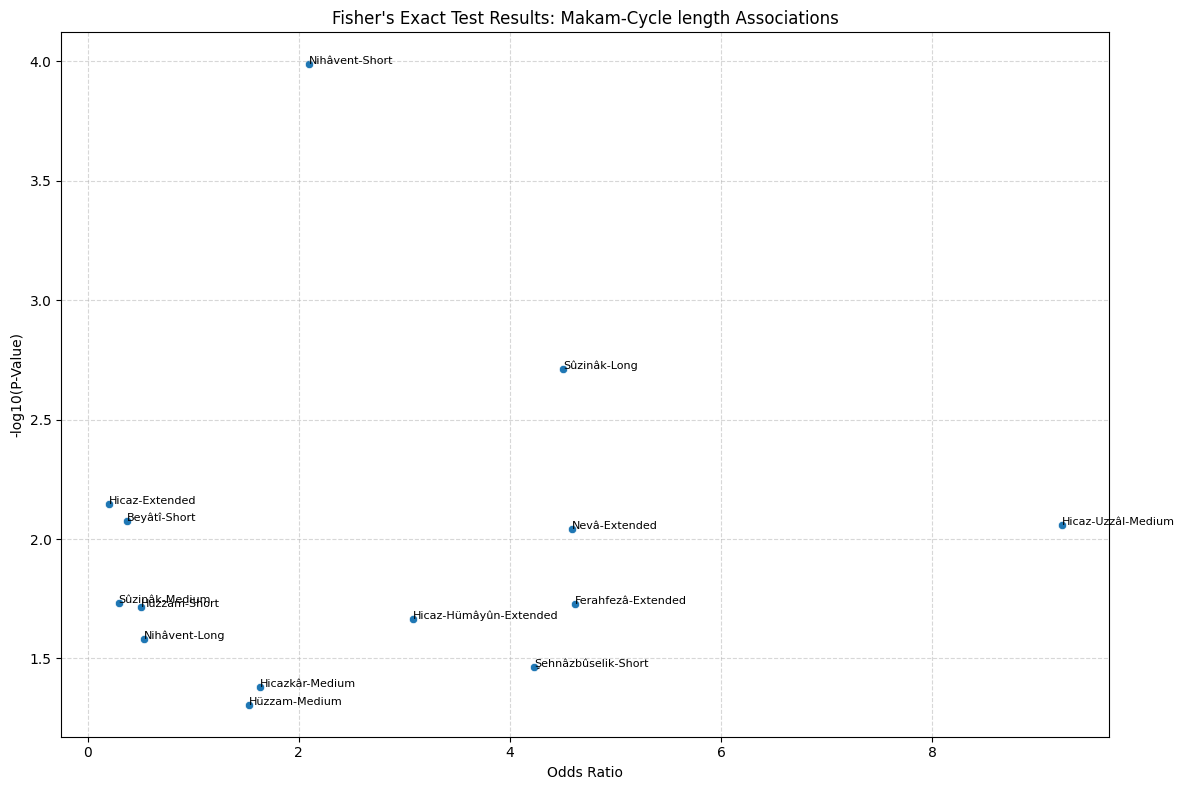

In [19]:
# Create a dataframe to store results
fisher_results = pd.DataFrame(
    columns=["Makam", "Cycle length", "Odds_Ratio", "P_Value"]
)

# For each Makam-Cycle length pair, create a 2x2 contingency table and run Fisher's exact test
for makam in contingency_table.index:
    for cycle_length in contingency_table.columns:
        # Get value for this specific Makam-Cycle length pair
        val = contingency_table.loc[makam, cycle_length]

        # Create 2x2 table:
        # [ val, row_sum - val ]
        # [ col_sum - val, total - row_sum - col_sum + val ]
        row_sum = contingency_table.loc[makam].sum()
        col_sum = contingency_table[cycle_length].sum()
        total = contingency_table.sum().sum()

        # Create the 2x2 table
        table = np.array(
            [
                [val, row_sum - val],
                [col_sum - val, total - row_sum - col_sum + val],
            ]
        )

        # Run Fisher's exact test
        odds_ratio, p_value = fisher_exact(table)

        # Store results
        fisher_results = fisher_results._append(
            {
                "Makam": makam,
                "Cycle length": cycle_length,
                "Odds_Ratio": odds_ratio,
                "P_Value": p_value,
            },
            ignore_index=True,
        )

# Apply multiple testing correction (Benjamini-Hochberg FDR)
fisher_results["FDR_P_Value"] = statsmodels.stats.multitest.fdrcorrection(
    fisher_results["P_Value"]
)[1]

# Sort by significance
fisher_results_sorted = fisher_results.sort_values("P_Value")

# Display top significant associations
print(
    "Top 15 most significant Makam-Cycle length associations by Fisher's exact test:"
)
print(fisher_results_sorted.head(15))

# Visualize top significant results
plt.figure(figsize=(12, 8))
top_results = fisher_results_sorted.head(15)
sns.scatterplot(
    x="Odds_Ratio",
    y="-log10(P_Value)",
    data=top_results.assign(
        **{"-log10(P_Value)": -np.log10(top_results["P_Value"])}
    ),
)

# Add labels for the top points
for i, row in top_results.iterrows():
    plt.text(
        row["Odds_Ratio"],
        -np.log10(row["P_Value"]),
        f"{row['Makam']}-{row['Cycle length']}",
        fontsize=8,
    )

plt.title("Fisher's Exact Test Results: Makam-Cycle length Associations")
plt.xlabel("Odds Ratio")
plt.ylabel("-log10(P-Value)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()